In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
property=pd.read_csv("11_Property_stolen_and_recovered_nature_of_property_2001_2010.csv")
property

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Cattle - Property,2. Cattle,0,1,0,1000
1,Andhra Pradesh,2001,Cattle - Property,2. Cattle,448,580,6490596,7233876
2,Arunachal Pradesh,2001,Cattle - Property,2. Cattle,22,34,135500,704500
3,Assam,2001,Cattle - Property,2. Cattle,149,322,683350,1816386
4,Bihar,2001,Cattle - Property,2. Cattle,144,334,896019,1911068
...,...,...,...,...,...,...,...,...
4545,Tamil Nadu,2010,Total Property(Nature),Total Property Stolen & Recovered,16125,21509,660311804,1317919190
4546,Tripura,2010,Total Property(Nature),Total Property Stolen & Recovered,192,879,5666102,33032746
4547,Uttar Pradesh,2010,Total Property(Nature),Total Property Stolen & Recovered,9130,35068,577591772,1442670414
4548,Uttarakhand,2010,Total Property(Nature),Total Property Stolen & Recovered,964,2234,47135685,123398840


In [3]:
property.Area_Name.value_counts()

Andaman & Nicobar Islands    130
Puducherry                   130
Maharashtra                  130
Manipur                      130
Meghalaya                    130
Mizoram                      130
Nagaland                     130
Odisha                       130
Punjab                       130
Lakshadweep                  130
Rajasthan                    130
Sikkim                       130
Tamil Nadu                   130
Tripura                      130
Uttar Pradesh                130
Uttarakhand                  130
Madhya Pradesh               130
Kerala                       130
Andhra Pradesh               130
Daman & Diu                  130
Arunachal Pradesh            130
Assam                        130
Bihar                        130
Chandigarh                   130
Chhattisgarh                 130
Dadra & Nagar Haveli         130
Delhi                        130
Karnataka                    130
Goa                          130
Gujarat                      130
Haryana   

In [4]:
property.Year.value_counts()

2001    455
2002    455
2003    455
2004    455
2005    455
2006    455
2007    455
2008    455
2009    455
2010    455
Name: Year, dtype: int64

In [5]:
property.Group_Name.value_counts()

Fire arms - Property                                  700
Cattle - Property                                     350
Communication and Electricity Wire - Property         350
Cultural Property including Antiques - Property       350
Cycle - Property                                      350
Electronic Components - Property                      350
Motor Vehicles - Motor car/Taxi/Jeep - Property       350
Motor Vehicles - Others - Property                    350
Motor Vehicles - Property                             350
Motor Vehicles -\tMotor Cycles/Scooters - Property    350
Other Nature of Property                              350
Total Property(Nature)                                350
Name: Group_Name, dtype: int64

* Group Name and Sub Group Name have the same number of instances per value type so they can be eliminated

In [6]:
property.Sub_Group_Name.value_counts()

2. Cattle                                    350
1. Communation and Electricity Wire          350
8. Cultural Property including Antiques      350
3. Cycle                                     350
7. Electronic Components                     350
5. Fire Arms                                 350
6. Explosives/Explosive Substances           350
4.2 Motor Vehicles - Motor Car/Taxi/Jeep     350
4.3 Motor Vehicles - Other Motor Vehicles    350
4. Motor Vehicles                            350
4.1 Motor Vehicles - Motor Cycle/Scooters    350
9. Other kinds of Property                   350
Total Property Stolen & Recovered            350
Name: Sub_Group_Name, dtype: int64

In [11]:
a=property.groupby(['Group_Name']).get_group('Fire arms - Property')
a.Sub_Group_Name.value_counts()

5. Fire Arms                          350
6. Explosives/Explosive Substances    350
Name: Sub_Group_Name, dtype: int64

In [14]:
a=property.groupby(['Group_Name']).get_group('Other Nature of Property')
a.Sub_Group_Name.value_counts()

9. Other kinds of Property    350
Name: Sub_Group_Name, dtype: int64

In [16]:
#Since Sub_Group_Name is an irrelevant variable as previously proven ,we will use property1 as the base dataset

property1=property.drop(['Sub_Group_Name'], axis=1)

* Lets group the dataset based on the Area_Name(States) and drop the Year column Adjusting the Plot Size Using Seaborn to plot the Bar Plot Graph for Area_Name and Cases_Property_Stolen Rotating the labels of the graph for better visibility

<AxesSubplot:xlabel='Area_Name', ylabel='Cases_Property_Stolen'>

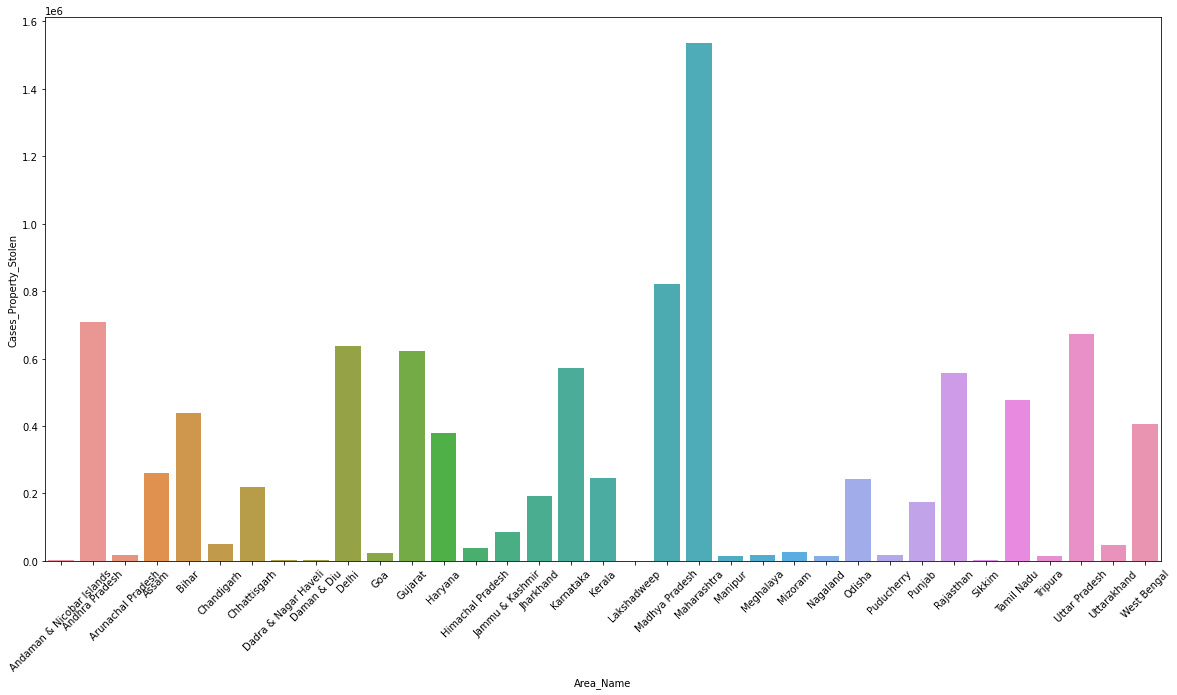

In [17]:
property_bystate=property1.groupby(['Area_Name'],as_index=False).sum()
property_bystate.drop("Year",axis=1,inplace=True)
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

<AxesSubplot:xlabel='Year', ylabel='Cases_Property_Stolen'>

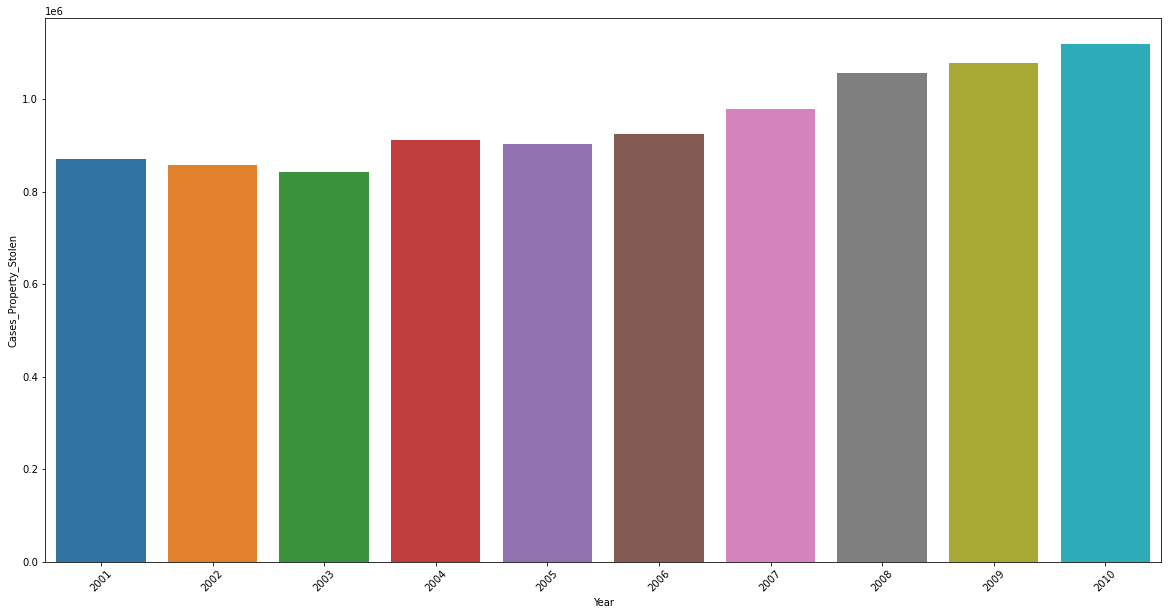

In [18]:
#Cases of Property Stolen across the year of all the States 
sortbyyear=property1.groupby(['Year'],as_index=False).sum()
sortbyyear
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=sortbyyear.Year,y=sortbyyear.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

<AxesSubplot:xlabel='Year', ylabel='Value_of_Property_Stolen'>

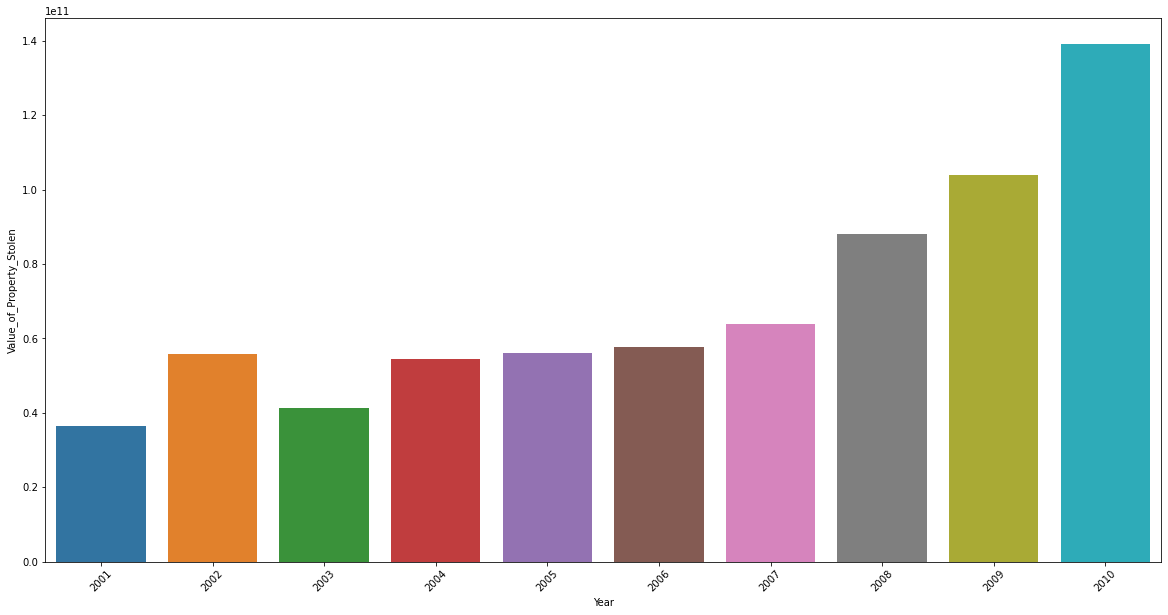

In [19]:
#Value of Property Stolen across the year of all the States 

plt.figure(figsize = (20, 10))
chart=sns.barplot(x=sortbyyear.Year,y=sortbyyear.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

<AxesSubplot:xlabel='Area_Name', ylabel='Value_of_Property_Stolen'>

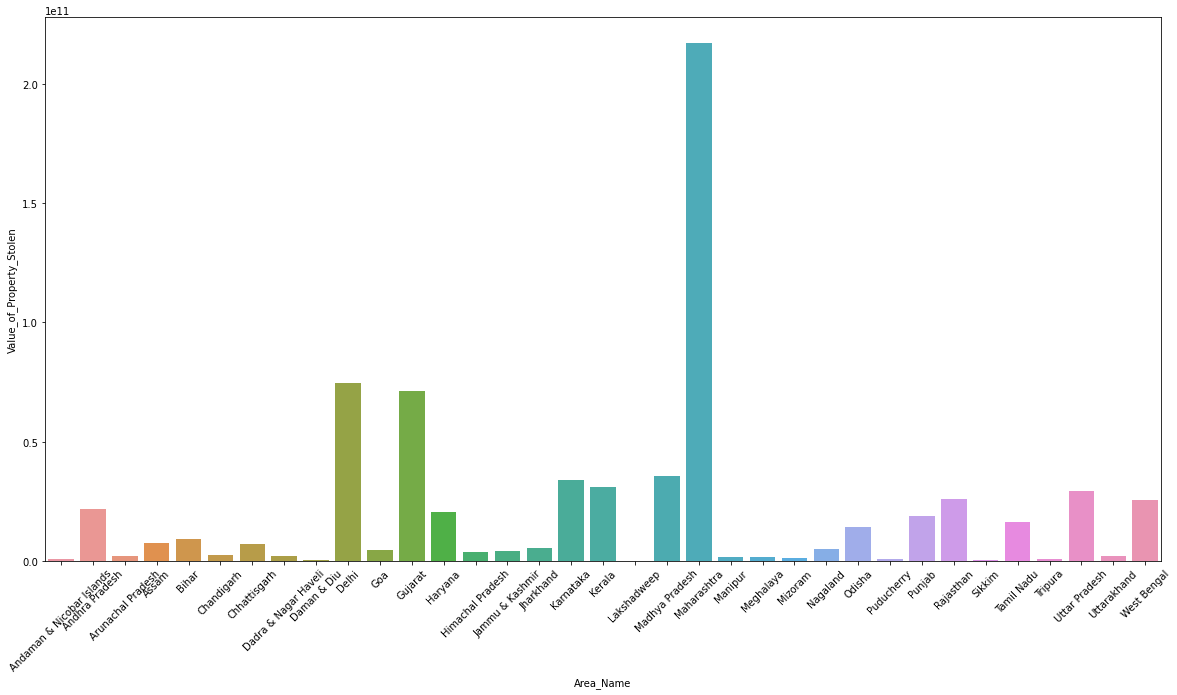

In [20]:
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=property_bystate.Area_Name,y=property_bystate.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

*From the Graph and the crosstab above ,we can see that Maharashtra has the most number of cases of stolen property and the value of the property stolen by a big margin So lets find out more about Maharashtra from the original dataset

<AxesSubplot:xlabel='Year', ylabel='Value_of_Property_Stolen'>

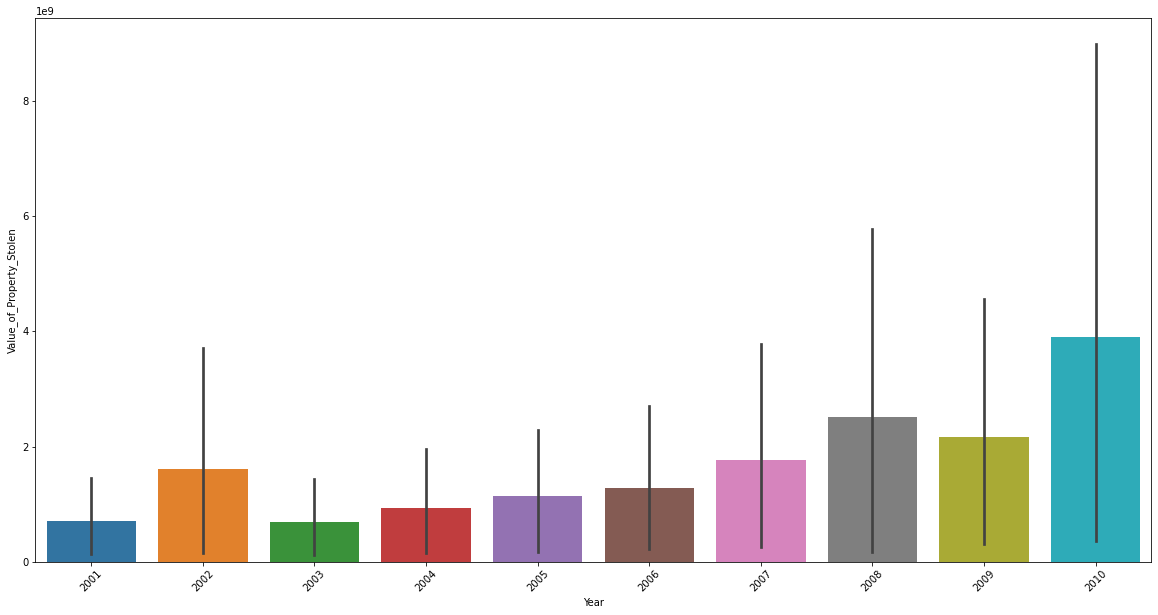

In [21]:
a=property1.groupby(['Area_Name']).get_group('Maharashtra')
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=a.Year,y=a.Value_of_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

<AxesSubplot:xlabel='Year', ylabel='Cases_Property_Stolen'>

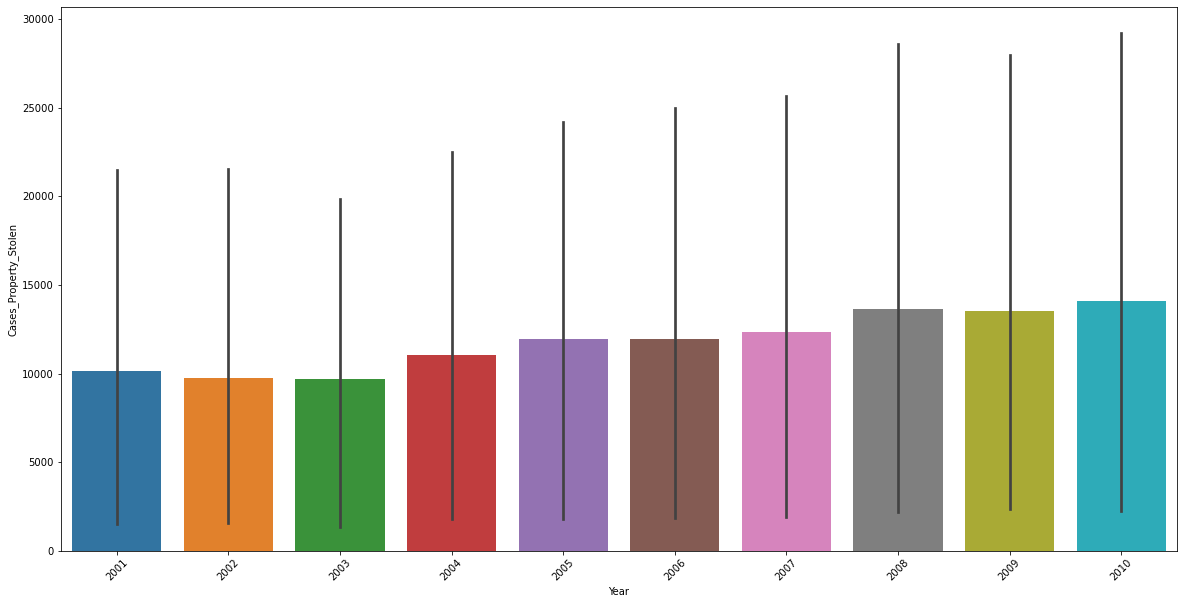

In [22]:
a=property1.groupby(['Area_Name']).get_group('Maharashtra')
plt.figure(figsize = (20, 10))
chart=sns.barplot(x=a.Year,y=a.Cases_Property_Stolen)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart

In [23]:
property.groupby(['Group_Name']).get_group('Fire arms - Property')

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
1750,Andaman & Nicobar Islands,2001,Fire arms - Property,5. Fire Arms,4,4,92000,92000
1751,Andaman & Nicobar Islands,2001,Fire arms - Property,6. Explosives/Explosive Substances,4,4,92000,92000
1752,Andhra Pradesh,2001,Fire arms - Property,5. Fire Arms,1480,3115,50311688,99449152
1753,Andhra Pradesh,2001,Fire arms - Property,6. Explosives/Explosive Substances,1480,3115,50311688,99449152
1754,Arunachal Pradesh,2001,Fire arms - Property,5. Fire Arms,27,36,2335600,3567000
...,...,...,...,...,...,...,...,...
2445,Uttar Pradesh,2010,Fire arms - Property,6. Explosives/Explosive Substances,2434,16705,178167432,517336269
2446,Uttarakhand,2010,Fire arms - Property,5. Fire Arms,244,853,19915200,59501600
2447,Uttarakhand,2010,Fire arms - Property,6. Explosives/Explosive Substances,244,853,19915200,59501600
2448,West Bengal,2010,Fire arms - Property,5. Fire Arms,622,4135,61254227,337774365


* Scatter Plot between Cases of Property Recovered and Stolen

<AxesSubplot:xlabel='Cases_Property_Recovered', ylabel='Cases_Property_Stolen'>

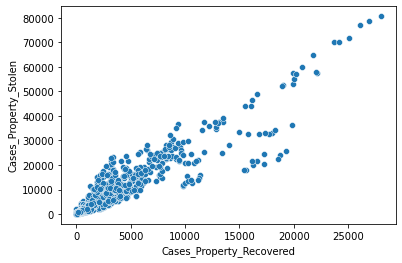

In [24]:
sns.scatterplot(x=property.Cases_Property_Recovered,y=property.Cases_Property_Stolen)

* The following code below gives us a difference of the Cases of Property Recovered from Total Cases of Property Stolen

In [25]:
property_bystate['Difference']=property_bystate["Cases_Property_Stolen"]- property_bystate["Cases_Property_Recovered"]
property_bystate

,Area_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen,Difference
0,Andaman & Nicobar Islands,1584,3753,58746894,652963034,2169
1,Andhra Pradesh,365664,707653,10042202784,21583696194,341989
2,Arunachal Pradesh,6404,17536,676669714,1999247979,11132
3,Assam,58574,260312,2050088094,7426993931,201738
4,Bihar,67602,437835,1444176791,9295129888,370233
5,Chandigarh,18449,50266,946569182,2615635654,31817
6,Chhattisgarh,75361,218707,2450294352,6912572828,143346
7,Dadra & Nagar Haveli,1281,2935,240858466,2061977572,1654
8,Daman & Diu,651,2386,97627917,418672357,1735
9,Delhi,185183,635795,3822400256,74497210284,450612


In [26]:
property_bystate['Percent_Recovery_Cases']=(property_bystate["Cases_Property_Recovered"]/ property_bystate["Cases_Property_Stolen"])*100

property_bystate.Percent_Recovery_Cases.sort_values()

21     5.783967
4     15.440063
15    19.857224
3     22.501460
34    22.937595
22    23.113843
24    23.674756
31    23.680532
8     27.284158
28    28.536826
32    28.936181
9     29.126212
18    30.026110
14    30.064803
10    30.106851
11    30.392476
13    30.446521
29    31.037489
16    31.849493
17    32.932950
20    33.549879
19    33.910290
33    33.978848
6     34.457516
2     36.519161
5     36.702741
12    42.147952
0     42.206235
7     43.645656
25    45.247021
26    49.126138
1     51.672783
27    54.073280
23    70.445123
30    78.636012
Name: Percent_Recovery_Cases, dtype: float64

*From the numbers we can understand that 21(Manipur) has the lowest recovery rate ,first row (5.78) Second is Bihar with 15.44 % rate followed by Jharkhand in the third place with 19.85 % recovery rate While with a RR of 78.63 ,(30)Tamil Nadu Police works most effeciently and productively followed by Mizoram(23) with 70.44 ,Punjab(27) with 54.07 % ,while Andhra Pradesh with 49.12% and Puducherry at 51.67% RR.*

***The mean recovery rates of all the states on recovery based on cases is 34.40 %***

In [27]:
property_bystate.Percent_Recovery_Cases.sort_values().mean()

34.40137560219731